In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
class bcolors:
    OK = '\033[92m' #GREEN
    WARNING = '\033[93m' #YELLOW
    FAIL = '\033[91m' #RED
    RESET = '\033[0m' #RESET COLOR


In [3]:
book1 = pd.read_csv('book1.csv')

# Printing out the head of the dataset
print(book1.head())

G_book1 = nx.Graph()
# Iterating through the DataFrame to add edges
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

# Creating a list of networks for all the books
books = [G_book1]
book_fnames = ['book2.csv', 'book3.csv', 'book4.csv', 'book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)
# Calcule du pourcentage d'apparition dans les livres des personnages de game of thrones
deg_cen_book1 = nx.degree_centrality(books[0])
deg_cen_book2 = nx.degree_centrality(books[1])
deg_cen_book3 = nx.degree_centrality(books[2])
deg_cen_book4 = nx.degree_centrality(books[3])
deg_cen_book5 = nx.degree_centrality(books[4])

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:5]
sorted_deg_cen_book2 =  sorted(deg_cen_book2.items(), key=lambda x:x[1], reverse=True)[0:5]
sorted_deg_cen_book3 =  sorted(deg_cen_book3.items(), key=lambda x:x[1], reverse=True)[0:5]
sorted_deg_cen_book4 =  sorted(deg_cen_book4.items(), key=lambda x:x[1], reverse=True)[0:5]

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book5 =  sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:5]
# Printing out the top 10 of book1 and book5
print(
    f"TOP 10 :\n Personnage les plus present dans la saison 1:"
)
for i in sorted_deg_cen_book1:
    print(bcolors.OK+f"{i[0]}:{i[1]:.3}"+bcolors.RESET)
print("\n")

print(
    f"TOP 10 :\n Personnage les plus present dans la saison 2:"
)
for i in sorted_deg_cen_book2:
    print(bcolors.OK+f"{i[0]}:{i[1]:.3}"+bcolors.RESET)
print("\n")

print(
    f"TOP 10 :\n Personnage les plus present dans la saison 3:"
      )
for i in sorted_deg_cen_book3:
    print(bcolors.OK+f"{i[0]}:{i[1]:.3}"+bcolors.RESET)
print("\n")

print(
    f"TOP 10 :\n Personnage les plus present dans la saison 4:"
)
for i in sorted_deg_cen_book4:
    print(bcolors.OK+f"{i[0]}:{i[1]:.3}"+bcolors.RESET)
print("\n")

print(
    f"TOP 10 :\n Personnage les plus present dans la saison 5:"
)
for i in sorted_deg_cen_book5:
    print(bcolors.OK+f"{i[0]}:{i[1]:.3}"+bcolors.RESET)
print("\n")


                            Source              Target        Type  weight  \
0                   Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                   Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   

   book  
0     1  
1     1  
2     1  
3     1  
4     1  
TOP 10 :
 Personnage les plus present dans la saison 1:
Eddard-Stark:0.355
Robert-Baratheon:0.269
Tyrion-Lannister:0.247
Catelyn-Stark:0.231
Jon-Snow:0.199


TOP 10 :
 Personnage les plus present dans la saison 2:
Tyrion-Lannister:0.205
Joffrey-Baratheon:0.182
Cersei-Lannister:0.167
Arya-Stark:0.155
Stannis-Baratheon:0.143


TOP 10 :
 Personnage les plus present dans la saison 3:
Tyrion-Lannister:0.195
Jon-Snow:0.172
Joffrey-Baratheon:0.166
Robb-Stark:0.162
Sansa-Sta

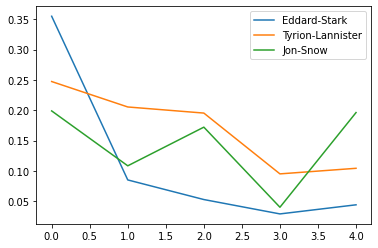

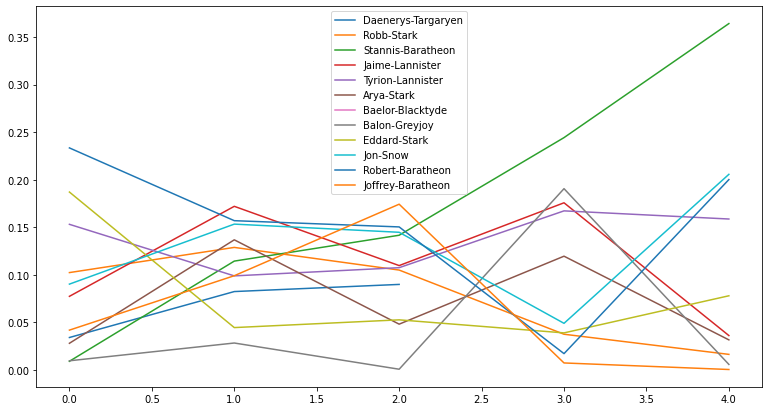

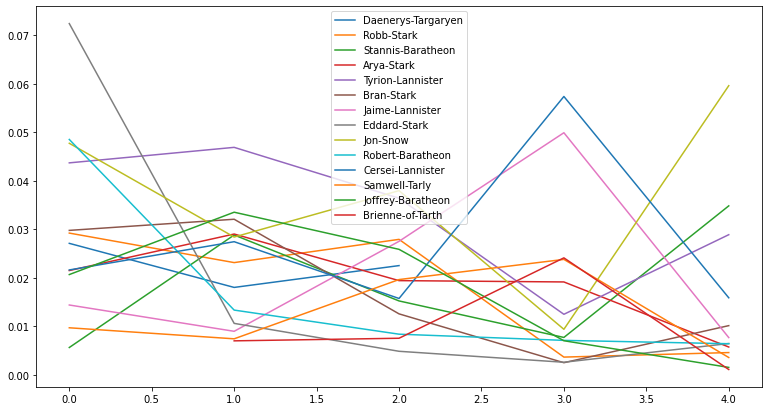

Jon-Snow Stannis-Baratheon


In [8]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

# Creating a list of betweenness centrality of all the books just like we did for degree centrality
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]

# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters
betweenness_evol_df[list_of_char].plot(figsize=(13, 7))
# Creating a list of pagerank of all the characters in all the books
evol = [nx.pagerank(book) for book in books]

# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the top characters
pagerank_evol_df[list_of_char].plot(figsize=(13, 7))
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(books[4]),
            nx.betweenness_centrality(books[4], weight='weight'),
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.T.corr()
# Finding the most important character in the fifth book,
# according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)
# Printing out the top character accoding to the three measures
plt.show()
print(p_rank, b_cent)